In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from matplotlib import pyplot as plt
import matplotlib.font_manager
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
import plotly.express as px 
from scipy import stats

/kaggle/input/shark-attack-dataset/list_coor_australia.csv
/kaggle/input/shark-attack-dataset/attacks.csv


==========================================================================================
============Testing the waters for information

In [2]:
sha = pd.read_csv('../input/shark-attack-dataset/attacks.csv')


In [3]:
sha.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

===========================================================================================================

*Columns this Data set contains:*

In [4]:
sha.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Data set size:

In [5]:
print('This dataset has ' + str(sha.shape[0]) + ' rows, and ' + str(sha.shape[1]) + ' columns')

This dataset has 25723 rows, and 24 columns


What this dataset looks like at a glance:

In [6]:
sha.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Alright, let's make our first graph.
So, a univariate analysis on **how many shark attacks happen every year: throughout the decades**.

- First we grab the data.
- Then we plot it in a simple graph.

Text(0.5, 1.0, 'Attacks Happened since 1950')

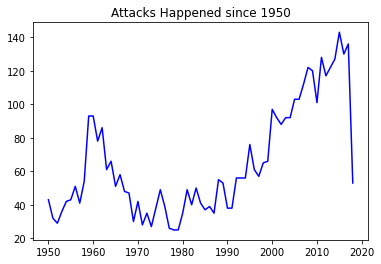

In [7]:
year = dict(sha['Year'].value_counts())
year = dict(sorted(year.items()))
year_cop=dict(year)
type(year_cop)
for x, y in year.items():
    if x<1950:
        del year_cop[x]
    else:
        pass
ax1=plt.plot(year_cop.keys(), year_cop.values(), 'b-')
plt.title('Attacks Happened since 1950')

In [8]:
#year = dict(sha['Year'].value_counts())
#year = dict(sorted(year.items()))
#year_cop=dict(year)

Years = sha['Year'].value_counts()
Years.describe()

count    249.000000
mean      25.301205
std       32.028491
min        1.000000
25%        2.000000
50%       13.000000
75%       35.000000
max      143.000000
Name: Year, dtype: float64

Finding out the time of attack, and analysing it.
Mean, Median, Mode.

In [9]:
# filling int the unknown values with string "Unknown shark"
sha['Time'] = sha['Time'].fillna('Unknown')

sha['New Time'] = None
time_pattern = r'[0-9]{2}h[0-9]{2}'

# Looping through every row in the dataFrame
for row in range(len(sha)):
    try:
        time = re.search(time_pattern, sha.iat[row, sha.columns.get_loc('Time')]).group()
        sha.iat[row, sha.columns.get_loc('New Time')] = time
    except:
        
        # Putting in the orignial value from the original Date column
        sha.iat[row, sha.columns.get_loc('New Time')] = sha['Time'].iloc[row]


byTime_count = sha['New Time'].value_counts().reset_index().rename(columns={'New Time':'Count','index':'Time'})
byTime_count.head()

,Time,Count
0,Unknown,22775
1,Afternoon,187
2,11h00,128
3,Morning,121
4,12h00,109


In [10]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [11]:
byTime_count.describe()

,Count
count,367.000000
mean,70.089918
std,1188.604964
min,1.000000
25%,1.000000
50%,1.000000
75%,5.000000
max,22775.000000


**Bivariate Analysis on Shark Species****

In [12]:
prov_activity = sha[sha.Type == 'Provoked'].groupby('Activity')['Activity'].count().sort_values(ascending=False)[:10]

fig = px.bar(prov_activity, x=prov_activity.values, y=prov_activity.index, orientation='h', labels={'index':'','x':'Attack Count'},
            title = 'Provoked Attacks by Activity')
fig.update_layout(height=500, width=800)
fig.show()

In [13]:
sha.rename(columns={'Species ':'Species'},inplace=True)
sha['Species'].value_counts()

White shark                                                          163
Shark involvement prior to death was not confirmed                   105
Invalid                                                              102
Shark involvement not confirmed                                       88
Tiger shark                                                           73
                                                                    ... 
3 m to 4 m white shark                                                 1
Lemon shark, 1164 mm, immature male, identified by  V.G. Springer      1
Bull shark, 3' to 4'                                                   1
White shark, 4 to 5 m [13' to 16.5']                                   1
Believed to involve a 2.8 m [9'3"] white shark                         1
Name: Species, Length: 1549, dtype: int64

In [14]:
import re

# Filling NaN value with string "Unknown shark"
sha['Species'] = sha['Species'].fillna('Unknown shark')

# Create new column to stored the extracted Shark species
sha['New Species'] = None

# Regular Expression pattern used to extract shark species (ultimately getting everything infront of the word "shark")
shark_pattern = r'.* (shark|Shark)'

# Looping through every row in the dataFrame
for row in range(len(sha)):
    try:
        shark_species = re.search(shark_pattern, sha.iat[row, sha.columns.get_loc('Species')]).group()
        sha.iat[row, sha.columns.get_loc('New Species')] = shark_species
    except:
        # Assuming that if there is nothing before string shark OR doesn't contain string shark at all,
        # then I will put the string Shark involvement not confirmed instead
         sha.iat[row, sha.columns.get_loc('New Species')] = "Shark involvement not confirmed"

bySpecies_count = sha['New Species'].value_counts().reset_index().rename(columns={'New Species':'Count','index':'Species'})
bySpecies_count.head()

,Species,Count
0,Unknown shark,22259
1,Shark involvement not confirmed,561
2,White shark,427
3,Tiger shark,233
4,Bull shark,122


In [15]:
#This is a univariate analysis

# Visualization - I won't be including first two rows of this dataFrame because the species of Shark is unknwon
fig = px.pie(data_frame = bySpecies_count.iloc[2:12,:],
             values = 'Count',
             names = 'Species',
             title = 'Top 10 Shark Species',
             color_discrete_sequence=px.colors.qualitative.Prism
             )

fig.update_traces(textposition ='outside',
                  textinfo = 'percent', pull = [0.1]*10)
fig.update_layout(paper_bgcolor='cornsilk',
                  legend_title = 'Shark Type',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

In [16]:
import plotly.graph_objects as go

#rename species column
sha = sha.rename(columns={'Species ':'Species'})
# species that attack most
# Not including unnamed species
species_attack = sha.groupby('Species')['Species'].count().sort_values(ascending=False)[1:15]

data = go.Bar(x = species_attack.index,y=species_attack.values,text=species_attack.values,textposition='auto', marker_color='lightblue')

layout = go.Layout(title = 'Shark Attack by Species', 
                   xaxis=dict(title='Species'),
                   yaxis=dict(title='Attack Count',visible=False),
                 paper_bgcolor='rgba(244,216,198,1.00)',
                 plot_bgcolor='rgba(252,248,244,1.00)'
                  )

fig = go.Figure(
    data=data,
    layout=layout
)   
fig.show()

In [17]:
species_attack.describe()

count     14.000000
mean      63.857143
std       39.095263
min       27.000000
25%       35.000000
50%       46.000000
75%       84.250000
max      163.000000
Name: Species, dtype: float64

In [18]:
species_attack.head()

Species
White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Name: Species, dtype: int64

In [19]:
prov_activity.describe()

count     10.000000
mean      29.500000
std       51.857176
min        5.000000
25%        7.000000
50%       10.500000
75%       13.500000
max      172.000000
Name: Activity, dtype: float64

In [20]:
prov_activity.head()

Activity
Fishing          172
Spearfishing      51
Shark fishing     14
Diving            12
Surfing           11
Name: Activity, dtype: int64